In [1]:
# initialize connection with GEE
import ee
from src.utils.gee import init_gee
init_gee() 


Successfully saved authorization token.


In [2]:
# load trained model from GEE assets
from src.gee.classification.model import load_classifier
asset_id = "projects/rmac-ethz/assets/s1tsdd_Ukraine/240307/classifier_3months_100trees"
classi = load_classifier(asset_id) #load trained classifier (by olivier) from GEE assets

In [3]:
classi.__class__

ee.Classifier

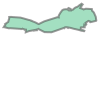

In [1]:
# load geometry it should be applied to in format that works for GEE
import geopandas as gpd
from shapely.geometry import mapping
from src.constants import PROCESSED_PATH
aoi_fp = PROCESSED_PATH / "unosat_aoi_all_countries.feather"
aois = gpd.read_feather(aoi_fp)
aoi = aois[aois.aoi == "UKR1"] # select AOI
geom_shapely = aoi.geometry.values[0]
geom_shapely

In [3]:
unosat = gpd.read_feather(PROCESSED_PATH / "unosat_labels_all_countries.feather")
unosat.country.unique() #only iraq, syria, palestine and ukraine

array(['Iraq', 'Syria', 'Palestine', 'Ukraine'], dtype=object)

In [11]:
unosat_ukr = unosat[unosat["country"] == "Ukraine"]
unosat_ukr["date"].value_counts()

2022-03-14    5659
2022-05-12    2919
2022-07-09    2687
2022-03-31    2628
2022-05-08    1826
2022-07-25    1560
2022-09-21    1402
2022-04-28    1032
2022-05-30     978
2022-05-07     825
2022-09-20     722
2022-04-24     521
2022-06-15     437
2022-04-25     434
2022-07-21     198
2022-05-02     167
2022-03-16     143
2022-10-14     141
2022-03-25     126
2022-10-17      90
2022-08-02      67
2022-07-24      55
2022-07-08      29
2022-06-29      26
2022-07-07      21
2022-07-27       1
Name: date, dtype: int64

In [2]:
unosat_ma = gpd.read_feather("T:/Documents/phd/code/data/gdfpost2016.feather")
unosat_ma.country.unique() #additionally includes libya, south sudan, myanmar

array(['Iraq', 'Syria', 'Libya', 'South Sudan', 'Myanmar',
       'Occupied Palestinian Territory', 'Ukraine'], dtype=object)

In [7]:
unosat_ma_irq = unosat_ma[unosat_ma["country"] == "Iraq"]
unosat_ma_irq["SensorDate"].value_counts()
# which 3 month time frames would this imply? + need 1 year pre period -> olivier also has 1 year before the war starts in ukraine as a post period... for testing?
# should probably check what UNOSAT used as pre-image, which date I mean?
# if not within 2014-04-04 and 2015-04-03: then I can use only labels that have a prev-date minus the ones of said prevdate as reference

2017-08-04    20787
2017-06-30     5536
2017-06-16     4040
2017-06-11     2589
2016-01-29     1142
2016-06-29      928
2016-06-28      316
2016-01-11        6
Name: SensorDate, dtype: int64

In [13]:
unosat_ma_mya = unosat_ma[unosat_ma["country"] == "Myanmar"]
unosat_ma_mya["SensorDate"].value_counts()
# earliest date: 2017-08-31

2017-09-16    3718
2017-09-25     708
2017-08-31     689
2018-02-13     613
2017-10-11     440
2018-03-18     257
2017-10-01     246
2018-01-09     232
2017-10-25     165
2017-12-16     142
2018-02-20     128
2017-11-28     104
2018-02-27     101
2017-11-08      98
2017-11-26      75
2018-03-07      51
2017-12-02      33
2018-02-19      27
2017-10-09       9
2017-10-03       7
2017-11-03       3
2018-02-16       2
Name: SensorDate, dtype: int64

In [12]:
unosat_irq = unosat[unosat["country"] == "Iraq"]

print(len(unosat_ma_irq), len(unosat_irq))
#why more labels in MA thesis dataset? are there duplicates? or other date range?

35344 27018


In [4]:
geom_ee = ee.Geometry(mapping(geom_shapely))
geom_ee

ee.Geometry({
  "functionInvocationValue": {
    "functionName": "GeometryConstructors.Polygon",
    "arguments": {
      "coordinates": {
        "constantValue": [
          [
            [
              37.672782868616956,
              47.13524372502194
            ],
            [
              37.68607659273889,
              47.13446018220566
            ],
            [
              37.68651227924495,
              47.13084325789454
            ],
            [
              37.68697907890087,
              47.130418190184706
            ],
            [
              37.687375074244436,
              47.13007676079124
            ],
            [
              37.6877423594315,
              47.12975961243509
            ],
            [
              37.68788053289862,
              47.129629273831526
            ],
            [
              37.68889927543139,
              47.12866829668309
            ],
            [
              37.6895687862194,
              47.127987488195316
            ],
            [
              37.69033795071511,
              47.12693624682987
            ],
            [
              37.690905118239414,
              47.12609076832348
            ],
            [
              37.69126403382298,
              47.12518656088107
            ],
            [
              37.69169875374179,
              47.12411153335596
            ],
            [
              37.692317092897945,
              47.12265225526402
            ],
            [
              37.69304193451754,
              47.121065205354526
            ],
            [
              37.693593243183805,
              47.119883898707556
            ],
            [
              37.69427767948025,
              47.11819660168384
            ],
            [
              37.69461179796872,
              47.117542099146895
            ],
            [
              37.695672667895074,
              47.11000558916353
            ],
            [
              37.69578700726106,
              47.109193307600925
            ],
            [
              37.695387766304385,
              47.1087395407347
            ],
            [
              37.69144796297909,
              47.107869279898985
            ],
            [
              37.68688486179726,
              47.10673745760932
            ],
            [
              37.68448739035627,
              47.106234910092944
            ],
            [
              37.68409550031357,
              47.10613414994482
            ],
            [
              37.6827166537261,
              47.10577962426881
            ],
            [
              37.68108154114428,
              47.10740044377034
            ],
            [
              37.681243625967596,
              47.10773003867909
            ],
            [
              37.68065521059189,
              47.107916335947195
            ],
            [
              37.67983427079647,
              47.10818906736847
            ],
            [
              37.6793127143324,
              47.10833415915699
            ],
            [
              37.67844213093941,
              47.108576347620875
            ],
            [
              37.6775603087239,
              47.10788463366424
            ],
            [
              37.67671852801388,
              47.107316929039385
            ],
            [
              37.67540878522796,
              47.10635554210671
            ],
            [
              37.673156263246284,
              47.105054151012645
            ],
            [
              37.67205206128557,
              47.10433220084036
            ],
            [
              37.671944770999595,
              47.10406473079702
            ],
            [
              37.672115645837984,
              47.103828118480706
            ],
            [
              37.672427059407646,
              47.10352574002688
            ],
            [
              37.67296505504

In [5]:
# define other parameters such as time period, features etc.
periodd = dict(
                time_periods={
                    "pre": ("2020-02-24", "2021-02-23"),  # always only one
                    "post": ("2021-02-24", "2021-05-23")  # here you could define more -> just need to loop through them then / adjust how you call the predict_geo() function (see src\gee\classification\ukraine_full_prediction.py for example)
                }
            )
reducers=["mean", "stdDev", "median", "min", "max", "skew", "kurtosis"]
windows=["3x3"]

In [ ]:
# could also store all these configurations in one of these dictionaries
from omegaconf import DictConfig, OmegaConf

cfg = OmegaConf.create(
        dict(
            aggregation_method="mean",
            model_name="random_forest",
            model_kwargs=dict(
                numberOfTrees=100,
                minLeafPopulation=3,
                maxNodes=1e4,
            ),
            data=dict(
                aois_test=[f"UKR{i}" for i in range(1, 19) if i not in [1, 2, 3, 4]],
                damages_to_keep=[1, 2],
                extract_winds=["3x3"],  # ['1x1', '3x3', '5x5']
                time_periods={  # to train
                    "pre": ("2020-02-24", "2021-02-23"),  # always only one
                    "post": "3months",
                },
            ),
            inference=dict(
                time_periods={
                    "pre": ("2020-02-24", "2021-02-23"),  # always only one
                    "post": [
                        ("2021-02-24", "2021-05-23"),
                        ("2021-05-24", "2021-08-23"),
                        ("2021-08-24", "2021-11-23"),
                        ("2021-11-24", "2022-02-23"),
                        ("2022-02-24", "2022-05-23"),
                        ("2022-05-24", "2022-08-23"),
                        ("2022-08-24", "2022-11-23"),
                        ("2022-11-24", "2023-02-23"),
                    ],
                },
                quadkey_zoom=8,
            ),
            reducer_names=["mean", "stdDev", "median", "min", "max", "skew", "kurtosis"],
            train_on_all=False,  # train on all damages (train + test split)
            verbose=0,
            export_as_trees=False,
            seed=123,
            run_name="240307",  # must be string
        )
    )


In [6]:
from src.gee.classification.inference import predict_geo

predi = predict_geo(geom_ee, classi, periodd["time_periods"], windows, reducers, verbose=1) 
# this function includes: 
    # retrieving an S1-image-collection from GEE for the specified geometry using this function: src.gee.data.collections.get_s1_collection()
    # selecting only those images that fall in the requested time periods
    # figuring out which orbits cover these spatio-temporal windows
    # turn the image collection into feature collections (which the classifier needs for input) based on reducers etc.
    # take focal mean of 3x3 windows ("convolve")
    # apply the classifier to each orbit to predict the damage #TODO find out: what is output of classifier? already binary or probabilities still?
    # aggregate the predictions from different orbits by their mean
    # turn predictions into image collection -> when exporting this: tif file! 

Orbits to infer: [116, 43, 94]


In [7]:
predi.__class__

ee.image.Image

In [8]:
# ee.batch.Export doesnt work atm because missing permission for: 'earthengine.exports.create'
task = ee.batch.Export.image.toDrive(
    image=predi.multiply(2**8 - 1).toUint8(),  # multiply by 255 and convert to uint8
    description="birke_export_test", #TODO
    folder="rmac_birke_test",
    fileNamePrefix="test_birke_", #TODO
    region=geom_ee,
    scale=10,
    maxPixels=1e13,
)
task.start()


In [ ]:
# trying to convert ee.Image into sth directly so that export isnt necessary: 

In [10]:
# getDownloadURL doesnt work because missing permission earthengine.thumbnails.create
import rioxarray as rxr

export_url = predi.getDownloadURL({
    'name': 'test_preds', 
    'region': geom_ee
})

preds_array = rxr.open_rasterio(export_url)
print(preds_array)

EEException: Permission 'earthengine.thumbnails.create' denied on resource 'projects/rmac-ethz' (or it may not exist).

In [16]:
import wxee
wxee.Initialize()
# https://github.com/aazuspan/wxee

In [18]:
predi = predi.set('system:time_start', 0) #workaround because system time is required for the function
predi.wx.to_tif()

EEException: Permission 'earthengine.thumbnails.create' denied on resource 'projects/rmac-ethz' (or it may not exist).

In [19]:
predi.wx.to_xarray()

EEException: Permission 'earthengine.thumbnails.create' denied on resource 'projects/rmac-ethz' (or it may not exist).

In [28]:
import numpy as np
image = predi.multiply(2**8 - 1).toUint8()
image.bandNames().getInfo()

['classification']

In [32]:
predi_arrs = np.array(image.sampleRectangle(region=geom_ee).getInfo())
predi_arrs

array({'type': 'Feature', 'geometry': {'type': 'Polygon', 'coordinates': [[[37.672782868616956, 47.13524372502194], [37.66791170278485, 47.133611330769945], [37.666088014960266, 47.1348519547514], [37.66064094728432, 47.136647543720535], [37.661909849962505, 47.13888313019798], [37.66280057717741, 47.14012624277722], [37.66416738364515, 47.14183939191615], [37.66465881959774, 47.14260193487387], [37.66372201958853, 47.142957087757885], [37.66573383529486, 47.14468059175246], [37.663553088704404, 47.14620558461433], [37.66138769971203, 47.14455524790263], [37.65889980475286, 47.14306154443228], [37.65678048765649, 47.140982824246954], [37.65393937422931, 47.139332325394484], [37.6502382478851, 47.13788026177084], [37.64908644509578, 47.137117651702184], [37.646521763942765, 47.135017804402125], [37.64475566621273, 47.13325219756657], [37.64160740531515, 47.132259670839886], [37.64137704493697, 47.13284474155752], [37.640578461514, 47.13383725736503], [37.639902737079204, 47.134558125307

In [33]:
print(predi_arrs)

{'type': 'Feature', 'geometry': {'type': 'Polygon', 'coordinates': [[[37.672782868616956, 47.13524372502194], [37.66791170278485, 47.133611330769945], [37.666088014960266, 47.1348519547514], [37.66064094728432, 47.136647543720535], [37.661909849962505, 47.13888313019798], [37.66280057717741, 47.14012624277722], [37.66416738364515, 47.14183939191615], [37.66465881959774, 47.14260193487387], [37.66372201958853, 47.142957087757885], [37.66573383529486, 47.14468059175246], [37.663553088704404, 47.14620558461433], [37.66138769971203, 47.14455524790263], [37.65889980475286, 47.14306154443228], [37.65678048765649, 47.140982824246954], [37.65393937422931, 47.139332325394484], [37.6502382478851, 47.13788026177084], [37.64908644509578, 47.137117651702184], [37.646521763942765, 47.135017804402125], [37.64475566621273, 47.13325219756657], [37.64160740531515, 47.132259670839886], [37.64137704493697, 47.13284474155752], [37.640578461514, 47.13383725736503], [37.639902737079204, 47.13455812530716], [

In [ ]:
# download prediction from drive: atm manually #TODO

In [ ]:
# visualize predictions

In [12]:
import geemap.core as geemap
m = geemap.Map()
display(m)

Map(center=[0, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text'…

In [13]:
m.add_layer(predi)
display(predi)

# rather try: when importing the tif file -> can visualize array normally, no need to use gee anymore

EEException: Permission 'earthengine.maps.create' denied on resource 'projects/rmac-ethz' (or it may not exist).

In [6]:
from src.postprocessing.utils import read_fp_within_geo 
from src.constants import PREDS_PATH

fp = PREDS_PATH / "test_birke_.tif"
preds_arr = read_fp_within_geo(fp, geom_shapely)
preds_arr

<xarray.DataArray (band: 1, y: 698, x: 2255)>
[1573990 values with dtype=uint8]
Coordinates:
  * band         (band) int32 1
  * x            (x) float64 37.49 37.49 37.49 37.49 ... 37.7 37.7 37.7 37.7
  * y            (y) float64 47.15 47.15 47.15 47.15 ... 47.08 47.08 47.08 47.08
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
    long_name:      classification

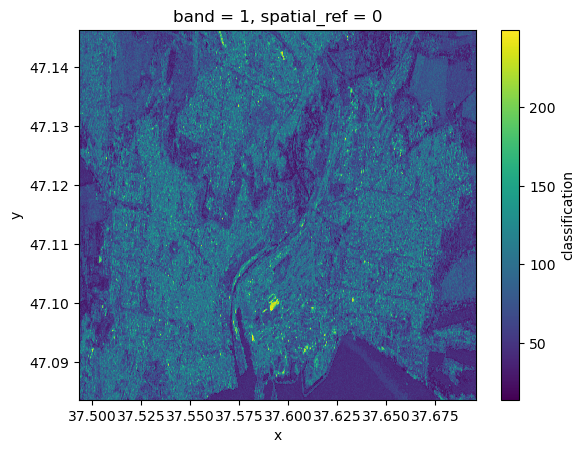

In [7]:
preds_arr.plot()

In [ ]:
#TODO more advanced plotting / using oliviers functions for this

In [63]:
# map onto building footprints #TODO requires a lot of storage and time! figure out how to best solve this, weil hab nur auf dem C-Laufwerk genug Speicherplatz...
from src.postprocessing.preds_buildings import compute_preds_buildings_aoi

buildings = compute_preds_buildings_aoi(fp, "UKR1")
buildings

Need to download the microsoft buildigns first


  0%|          | 0/288 [00:00<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
# load unosat labels 

In [8]:
# sample predictions by unosat labels

import geopandas as gpd
import multiprocessing as mp
import numpy as np
import pandas as pd
from tqdm import tqdm
import xarray as xr
import warnings


from src.data.buildings.overture_unosat import load_overture_buildings_aoi
from src.data import get_unosat_geometry
from src.data.utils import get_all_aois
#from src.postprocessing.drive_to_results import find_post_dates #requires pydrive settings which I dont have atm
from src.postprocessing.utils import read_fp_within_geo, vectorize_xarray_3d
from src.constants import PREDS_PATH

idx = pd.IndexSlice

In [ ]:
def get_preds_geo(geo, run_name):

    post_dates = find_post_dates(run_name)
    post_dates_ = [p[0] for p in post_dates]  # keep only first date for reference

    # Read and stack preds for each date
    fp_preds = [PREDS_PATH / run_name / f'ukraine_{"_".join(post_date)}.tif' for post_date in post_dates]
    dates = xr.Variable("date", pd.to_datetime(post_dates_))
    preds = xr.concat(
        [read_fp_within_geo(fp, geo) for fp in fp_preds], dim=dates
    ).squeeze()
    return preds

In [9]:
from src.data import load_unosat_labels

run_name = "240307"

def extract_raster_value(point, raster):
    value = raster.sel(x=point.x, y=point.y, method="nearest").item()
    return value

def combine_all_unosat_points_with_preds(aoi_str, run_name):
    gdf_labels_ = None
    #for aoi in tqdm(get_all_aois()):
        #geo = get_unosat_geometry(aoi)
        #preds = get_preds_geo(geo, run_name)
    preds = read_fp_within_geo(fp, geom_shapely).squeeze() #further above this is called preds_arr by birke
    gdf_labels = load_unosat_labels(aoi_str, labels_to_keep=[1,2])[['geometry']]
    gdf_labels['aoi'] = aoi_str
    gdf_labels[f'pred_2021-02-24'] = gdf_labels.geometry.apply(lambda x: extract_raster_value(x, preds))
    gdf_labels_ = pd.concat([gdf_labels_, gdf_labels]) if gdf_labels_ is not None else gdf_labels
    return gdf_labels_
    #gdf_labels.to_file(PREDS_PATH / run_name / 'aoi_preds' / 'unosat_points_with_preds.geojson', driver='GeoJSON')

    #gdf_labels_.to_file(PREDS_PATH / run_name / 'aoi_preds' / 'unosat_points_with_preds.geojson', driver='GeoJSON')

def load_unosat_points_with_preds(run_name):
    fp = PREDS_PATH / run_name / 'aoi_preds' / 'unosat_points_with_preds.geojson'
    assert fp.exists(), f"File {fp} does not exist."
    return gpd.read_file(fp)

In [37]:
gdf_labels = load_unosat_labels(aoi["aoi"], labels_to_keep=[1,2])[['geometry']]
gdf_labels

,geometry
unosat_id,
6238,POINT (37.49984 47.10107)
6248,POINT (37.50102 47.09399)
8438,POINT (37.50126 47.09952)
6235,POINT (37.50250 47.09857)
6097,POINT (37.50640 47.10921)
...,...
10872,POINT (37.68503 47.12026)
10700,POINT (37.68623 47.12730)
5985,POINT (37.68676 47.12108)


In [34]:
aoi

,aoi,geometry
14,UKR1,"POLYGON ((37.67278 47.13524, 37.68608 47.13446..."


In [33]:
labels_fp = PROCESSED_PATH / "unosat_labels.feather"

gdf = gpd.read_feather(labels_fp).reset_index(drop=True)
gdf

,date,damage,geometry,layer,gdb,city,country,ep,prev_date,prev_damage,aoi
0,2022-03-14 00:00:00+00:00,4,POINT (37.64983 47.11908),UNOSAT_Mariupol_Livoberezhyny_DA_12May2022,UNOSAT_LivoberezhnyiDistrict_DA_12May2022,Mariupol,Ukraine,1,NaT,-99,UKR1
1,2022-03-14 00:00:00+00:00,2,POINT (37.64871 47.11736),UNOSAT_Mariupol_Livoberezhyny_DA_12May2022,UNOSAT_LivoberezhnyiDistrict_DA_12May2022,Mariupol,Ukraine,1,NaT,-99,UKR1
2,2022-03-14 00:00:00+00:00,3,POINT (37.64650 47.11710),UNOSAT_Mariupol_Livoberezhyny_DA_12May2022,UNOSAT_LivoberezhnyiDistrict_DA_12May2022,Mariupol,Ukraine,1,NaT,-99,UKR1
3,2022-03-14 00:00:00+00:00,3,POINT (37.64586 47.11715),UNOSAT_Mariupol_Livoberezhyny_DA_12May2022,UNOSAT_LivoberezhnyiDistrict_DA_12May2022,Mariupol,Ukraine,1,NaT,-99,UKR1
4,2022-03-14 00:00:00+00:00,3,POINT (37.64622 47.11695),UNOSAT_Mariupol_Livoberezhyny_DA_12May2022,UNOSAT_LivoberezhnyiDistrict_DA_12May2022,Mariupol,Ukraine,1,NaT,-99,UKR1
...,...,...,...,...,...,...,...,...,...,...,...
24689,2022-06-15 00:00:00+00:00,7,POINT (36.35424 50.05095),Kharkiv_CDA_20220615_Final,Kharkiv_CDA_20220615,Kharkiv,Ukraine,2,2022-04-24 00:00:00+00:00,7,UKR7
24690,2022-06-15 00:00:00+00:00,7,POINT (36.35136 50.04908),Kharkiv_CDA_20220615_Final,Kharkiv_CDA_20220615,Kharkiv,Ukraine,2,2022-04-24 00:00:00+00:00,7,UKR7
24691,2022-06-15 00:00:00+00:00,7,POINT (36.35942 50.05455),Kharkiv_CDA_20220615_Final,Kharkiv_CDA_20220615,Kharkiv,Ukraine,2,2022-04-24 00:00:00+00:00,7,UKR7
24692,2022-06-15 00:00:00+00:00,7,POINT (36.34885 50.05056),Kharkiv_CDA_20220615_Final,Kharkiv_CDA_20220615,Kharkiv,Ukraine,2,2022-04-24 00:00:00+00:00,7,UKR7


In [29]:
preds = read_fp_within_geo(fp, geom_shapely)
preds

<xarray.DataArray (band: 1, y: 698, x: 2255)>
[1573990 values with dtype=uint8]
Coordinates:
  * band         (band) int32 1
  * x            (x) float64 37.49 37.49 37.49 37.49 ... 37.7 37.7 37.7 37.7
  * y            (y) float64 47.15 47.15 47.15 47.15 ... 47.08 47.08 47.08 47.08
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
    long_name:      classification

In [10]:
gdf_ = combine_all_unosat_points_with_preds("UKR1", run_name)
gdf_
#gdf_points = load_unosat_points_with_preds(run_name)

,geometry,aoi,pred_2021-02-24
unosat_id,,,
6238,POINT (37.49984 47.10107),UKR1,61
6248,POINT (37.50102 47.09399),UKR1,81
8438,POINT (37.50126 47.09952),UKR1,87
6235,POINT (37.50250 47.09857),UKR1,78
6097,POINT (37.50640 47.10921),UKR1,128
...,...,...,...
10872,POINT (37.68503 47.12026),UKR1,99
10700,POINT (37.68623 47.12730),UKR1,81
5985,POINT (37.68676 47.12108),UKR1,88


In [11]:
precisions = []
recalls = []
f1s = []
f05s = []
f01s = []
thresholds = np.arange(0.1,0.9, 0.01)
for t in thresholds:
    tp = (gdf_[f'pred_2021-02-24']>=255*t).sum()
    fn = (gdf_[f'pred_2021-02-24']<255*t).sum()
    fp = (gdf_[f'pred_2021-02-24']>=255*t).sum() #TODO dates not correct yet! in oliviers code: fp abd tp for example based on different dates (why?)
    tn = (gdf_[f'pred_2021-02-24']<255*t).sum()
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1 = 2*(precision*recall)/(precision+recall)
    beta=0.5
    f05 = (1+beta**2)*tp/((1+beta**2)*tp+fp + beta**2*fn)
    beta=0.1
    f01 = (1+beta**2)*tp/((1+beta**2)*tp+fp + beta**2*fn)
    precisions.append(precision)
    recalls.append(recall)
    f1s.append(f1)
    f05s.append(f05)
    f01s.append(f01)

C:\Users\pfeifleb\AppData\Local\Temp\ipykernel_35240\182856736.py:12: RuntimeWarning: invalid value encountered in scalar divide
  precision = tp/(tp+fp)


In [13]:
print(recalls)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9996076892899176, 0.9996076892899176, 0.9980384464495881, 0.9956845821890937, 0.9901922322479404, 0.9811690859160455, 0.9741074931345626, 0.964299725382503, 0.954099646920361, 0.9380149078069832, 0.9231071008238525, 0.8964299725382503, 0.8775990584542958, 0.8434680266771283, 0.8042369556688898, 0.7748136524127108, 0.7312671635935661, 0.6975284425264809, 0.6386818360141232, 0.6025892506865438, 0.5539427226363279, 0.5170655158885837, 0.4601804629266379, 0.4178109062377403, 0.3511180855237348, 0.2883483719105532, 0.25460965084346804, 0.2051785013730875, 0.1808552373479796, 0.14829344841114162, 0.12553942722636327, 0.09611612397018439, 0.08356218124754806, 0.0666928207140055, 0.05531581012161632, 0.04472342094939192, 0.03766182816790899, 0.03334641035700275, 0.026677128285602196, 0.021969399764613574, 0.017653981953707338, 0.015300117693213025, 0.011377010592389172, 0.009023146331894862, 0.00745390349156532, 0.006276971361318164, 0.0051000392310710085,

In [ ]:
# evaluate unosat pixels

In [ ]:
# store predictions? in DB?